In [1]:
import numpy as np
import pandas as pd
from scipy import stats

###  Tóm tắt Z-test và t-test trong kiểm định giả thuyết (dùng cho kiểm định)

####  Khi nào dùng Z, khi nào dùng t? 

- Nếu **biết** $ \sigma $ (độ lệch chuẩn quần thể) → Dùng **Z-test**
- Nếu **không biết**  $\sigma $, chỉ có \( s \) (độ lệch chuẩn mẫu) → Dùng **t-test**

---

###  Công thức: cho trung bình

####  **Kiểm định Z (khi biết $ \sigma $)**:

$$z = \frac{\bar{x} - \mu_0}{\frac{\sigma}{\sqrt{n}}}$$


####  **Kiểm định t (khi không biết $ \sigma $, dùng \( s \))**:
$$
t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}
$$

---

###  Trong đó:
- $\bar{x} $: Trung bình mẫu  
- $\mu_0 $: Trung bình theo giả thuyết $ H_0 $  
- $ s $: Độ lệch chuẩn mẫu  
- $ \sigma $: Độ lệch chuẩn quần thể  
- $ n $: Kích thước mẫu  

---

###  Ghi nhớ nhanh:
> Biết $ \sigma $ → Z-test  
>  Không biết $ \sigma $ → t-test

### **Bài 1.** (4)
a) Đọc dữ liệu và cho biết có bao nhiêu thí sinh trong bảng dữ liệu. Tính điểm trung bình, độ lệch chuẩn, phương sai của điểm môn Ngữ Văn ("ngu_van") (0.5đ)

b) Chọn ngẫu nhiên 25 mẫu, sử dụng 25 mẫu này để ước lượng điểm trung bình của môn Ngữ Văn (sử dụng độ lệch chuẩn tính được bên trên làm độ lệch chuẩn quần thể) với độ tin cậy là 95%. (3đ)

c) Từ kết quả ước lượng bên trên hãy cho nhận xét về giá trị trung bình ước lượng và giá trị thật tính từ dữ liệu. (0.5đ)

In [2]:
# 1 (0.5đ)
data = pd.read_csv('dataKHXH.csv')
print(f"Có {data.shape[0]} thí sinh trong bảng dữ liệu.")
mean = data['ngu_van'].mean()
print(f"Điểm trung bình của thí sinh là {mean:.2f}.")
std = data['ngu_van'].std()
var = data['ngu_van'].var()
print(f"Độ lệch chuẩn của điểm là {std:.2f}.")
print(f"Phương sai của điểm là {var:.2f}.")

Có 565243 thí sinh trong bảng dữ liệu.
Điểm trung bình của thí sinh là 7.02.
Độ lệch chuẩn của điểm là 1.32.
Phương sai của điểm là 1.74.


In [3]:
# 2 sample 500 thí sinh từ bảng dữ liệu (0.5đ)
n = 25
sample = data.sample(n, random_state=15) # lấy mẫu 25 thí sinh từ bảng dữ liệu
sample_mean = sample['ngu_van'].mean() #Tính trung bình mẫu x̄ cho điểm môn Ngữ Văn của 25 người,
#Đây chính là ước lượng điểm trung bình quần thể.
print(f"Điểm trung bình của 25 thí sinh là {sample_mean:.2f}.")

Điểm trung bình của 25 thí sinh là 7.00.


Gọi $\mu$ là điểm trung bình môn Ngữ Văn của tập dữ liệu. Ta có, $\bar{x}=7.00$ là điểm trung bình môn Ngữ Văn của 25 thí sinh.

Độ tin cậy $95\% = 1 - \alpha$ => $\alpha=0.05$
<br>
trong trường hợp ko có độ lệch chuẩn <br>
Ta có $n = 25 < 30$. => ta sấp sỉ phân phối trên với phân phối **student t** với bậc tự do là n-1, ta có:
$$\bigg(\bar{x} - t_{n-1;1-\frac{\alpha}{2}}\frac{s}{\sqrt{n}},\bar{x}+t_{n-1;1-\frac{\alpha}{2}}\frac{s}{\sqrt{n}}\bigg)$$
Trong đó, $\alpha = 0.05$, $z_{1-\frac{\alpha}{2}}=1.96$, $\bar{x}=7.44$, $s=0.94$
<br>
Sử dụng phân phối chuẩn (Z)vì đề yêu cầu dùng độ lệch chuẩn quẩn thể $\sigma$
$$ \bar{x} \pm z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} $$
trong đó: <br> 
$\alpha$ = 0.05 (độ tin cậy 95%) <br>
$z_{\alpha/2}$ = 1.6 (giá trị tới hạn từ bảng Z) <br>
n = 25 <br>
sử dụng 25 mẫu này để ước lượng điểm trung bình của môn Ngữ Văn (sử dụng độ lệch chuẩn tính được bên trên làm độ lệch chuẩn quần thể) với độ tin cậy là 95%


In [ ]:
# 1đ
alpha = 0.05 # mức ý nghĩa 5%, tương ứng với khoảng tin cậy 95%
sigma = std # Độ lệch chuẩn của quần thể

# cách làm khi ko biết σ (độ lệch chuẩn quần thể)
#Khi không biết σ (độ lệch chuẩn quần thể), ta phải thay bằng s (độ lệch chuẩn mẫu).

# t = stats.t.ppf(1-alpha/2,n-1)
# print(f"z- scorecủa phân phối chuẩn với độ tin cậy {1-alpha:.2f} là {t:.2f}.")
# print(sample_mean-t*std/np.sqrt(n), sample_mean+t*std/np.sqrt(n))
#------------------------------------------------------------------

# cách làm khi biết σ (độ lệch chuẩn quần thể)

# lấy giá trị z tương đương với độ tin cậy 95%
z = stats.norm.ppf(1-alpha/2) # z-score cho phân phối chuẩn 
margin_error = z * (sigma / np.sqrt(n)) # Tính sai số biên (chuẩn) z(alpha/2) * (σ/√n)
# Tính khoảng tin cậy 95% cho điểm môn Ngữ Văn của 25 thí sinh
# Khoảng tin cậy 95% cho điểm môn Ngữ Văn của 25 thí sinh là (x̄ - z(α/2) * (σ/√n), x̄ + z(α/2) * (σ/√n))
confidence_interval = (sample_mean - margin_error, sample_mean + margin_error)

print(f"trung bình mẫu môn ngữ văn là {sample_mean:.2f}.")
print(f"Khoảng tin cậy 95%  ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}).")


trung bình mẫu môn ngữ văn là 7.00.
Khoảng tin cậy 95%  (6.48, 7.52).


**(0.5đ)** Vậy khoảng giá trị trung bình thật là: (6.45:7.55) với khoảng tin cậy 95%

c) Ta nhận thấy giá trị trung bình của tập dữ liệu nằm trong khoảng ước lượng, điều này cho thấy khoảng ước lượng đáng tin cậy. Tuy nhiên tại số lượng mẫu được lấy ra ít nên sai số lớn


### **Bài 2**
Lấy ngẫu nhiên 1000 mẫu dữ liệu từ dữ liệu gốc, có nhận xét cho rằng: "Có từ 75% thí sinh khối KHXH có điểm Toán trên trung bình". Bạn có thể đưa ra kết luận gì nhận xét trên dựa vào 1000 mẫu vừa lấy được với mức ý nghĩa 5%? (4đ)

"Có từ 75% thí sinh khối KHXH có điểm Toán trên trung bình" (tức là lớn hơn hoặc bằng 5). <br>
⟶ Đây là kiểm định giả thuyết về tỷ lệ (proportion) với: <br>
$H_0 : p = 0.75$: (giả thuyết gốc — đúng như nhận xét)
$H_1 : p < 0.75$: (phủ định: tỉ lệ thấp hơn 75%)


In [5]:
n = 1000
sample = data.sample(n, random_state=15)

In [6]:
# 0.25đ
gte5 = sample[sample['toan'] >= 5].shape[0] # số thí sinh có điểm toán >= 5
print("Số thí sinh trên điểm trung bình: ",gte5)
p_mu = gte5/n # tỉ lệ thí sinh có điểm toán >= 5
print("Tỉ lệ thí sinh trên trung bình: ",p_mu)

Số thí sinh trên điểm trung bình:  746
Tỉ lệ thí sinh trên trung bình:  0.746


Gọi $p$ là thí sinh có điểm Toán trên trung bình. Ta cần kiểm định giả thuyết:

$H_0 : p \ge 0.75$: Có từ 75% thí sinh khối KHXH có điểm Toán trên trung bình

$H_1: p < 0.75$: Tỉ lệ thí sinh khối KHXH có điểm Toán trên trung bình thấp hơn 75%

Mức ý nghĩa là: $5\% => \alpha=0.05$

In [7]:
p = 0.75
alpha = 5/100

- Điểm thi của các thí sinh trên trung bình hay không là độc lập với nhau nên tỉ lệ thí sinh đạt điểm trên trung bình tuân theo phân phối nhị thức.
- Ta có
    - $\hat{p} = 0.75$ là tỷ lệ thí sinh có điểm Toán trên trung bình.
    - $n=1000 > 30$,
    - $\hat{p}=0.75$, $n\hat{p}=1000\times0.75=750 \geq 5$
    - $n(1-\hat{p}) = 1000(1-0.75)= 250 \geq 5$
    
=> Vậy phân phối nhị thức của tỷ lệ mẫu có thể xấp xỉ bằng phân phối chuẩn.
$$z=\frac{\hat{p}-p}{\sqrt{\frac{pq}{n}}}$$

In [9]:
# 0.25đ
z = (p_mu - p)/np.sqrt(p*(1-p)/n)
print("z =", z)

z = -0.29211869733608886


Vì $H_1$ là $<$ là kiểm định đuôi trái nên ta có
$$p_{values} = P(Z<z)$$

In [10]:
p_value = stats.norm.cdf(z)
print("p_value là: ", p_value)
if p_value < alpha:
    print('Reject H0')
else:
    print('Accept H0')

p_value là:  0.38509793572820483
Accept H0


Vì $p_{value} = 0.386 > \alpha=0.05$ nên ta kết luận: không có đủ bằng chứng để bác bỏ nhận xét trên với mức ý nghĩa 5%$

### **Bài 2A** :
 Điểm trung bình môn Văn của học sinh toàn trường được cho là 6.5. Một giáo viên nghi ngờ lớp mình học tốt hơn, và lấy mẫu 40 học sinh, tính được trung bình là 6.9 với độ lệch chuẩn 1.2. Có đủ bằng chứng khẳng định lớp học tốt hơn mức chung không? (α = 0.05)

Biết độ lệch chuẩn của quần thể (σ = 1.2):
→ Dùng kiểm định Z (không dùng t-test, vì t-test dùng khi không biết σ).

Cỡ mẫu lớn (n = 40 ≥ 30):
→ Thỏa điều kiện áp dụng phân phối chuẩn theo định lý giới hạn trung tâm.

Mục tiêu kiểm tra có lớn hơn (>):
→ Dùng kiểm định một phía bên phải.

###  Công thức kiểm định Z một phía:
$$
Z = \frac{\bar{x} - \mu_0}{\sigma / \sqrt{n}}
$$


Trong đó:
- x̄: Trung bình mẫu
- μ₀: Trung bình giả định (mức chung)
- σ: Độ lệch chuẩn của quần thể
- n: Cỡ mẫu

In [2]:
import numpy as np
from scipy import stats

# Giả thuyết:
# H0: mu = 6.5
# H1: mu > 6.5

mu_0 = 6.5     # giá trị trung bình giả định
x_bar = 6.9    # trung bình mẫu
sigma = 1.2    # độ lệch chuẩn quần thể
n = 40         # cỡ mẫu
alpha = 0.05   # mức ý nghĩa

# Tính Z
z = (x_bar - mu_0) / (sigma / np.sqrt(n))
print("Z =", z)

# Tính p-value (vì kiểm định 1 phía bên phải, dùng 1 - cdf)
p_value = 1 - stats.norm.cdf(z)
print("p-value =", p_value)

# Kết luận
if p_value < alpha:
    print("→ Bác bỏ H0: Có bằng chứng cho thấy lớp học tốt hơn mức chung.")
else:
    print("→ Chưa đủ bằng chứng để kết luận lớp học tốt hơn.")

Z = 2.1081851067789215
p-value = 0.017507490509831136
→ Bác bỏ H0: Có bằng chứng cho thấy lớp học tốt hơn mức chung.


### **Bài 2B** ():
Một mẫu gồm 60 học sinh có điểm trung bình môn Toán là 6.2, độ lệch chuẩn 1.4. Hãy xây dựng khoảng tin cậy 95% cho điểm trung bình thật sự của toàn khối.

Biết độ lệch chuẩn của quần thể (σ = 1.4):
→ Dùng z-distribution để xây dựng khoảng tin cậy.

Cỡ mẫu lớn (n = 60 ≥ 30):
→ Thỏa điều kiện sử dụng phân phối chuẩn (do định lý giới hạn trung tâm).

Xây dựng khoảng tin cậy cho trung bình thật sự của toàn khối (2 phía):
→ Dùng khoảng tin cậy hai phía với mức tin cậy 95%.

### Công thức khoảng tin cậy 95% cho trung bình (biết σ):

$$
\left( \bar{x} - z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}},\ \bar{x} + z_{\alpha/2} \cdot \frac{\sigma}{\sqrt{n}} \right)
$$

Trong đó:
- $\bar{x} $: Trung bình mẫu  
- $ \sigma $: Độ lệch chuẩn của quần thể  
- $ n $: Cỡ mẫu  
- $ z_{\alpha/2} $: Giá trị Z tới hạn tương ứng với mức tin cậy  

In [3]:
import numpy as np
from scipy import stats

x_bar = 6.2       # trung bình mẫu
sigma = 1.4       # độ lệch chuẩn quần thể
n = 60            # cỡ mẫu
alpha = 0.05

# Z-score cho 95% CI (2 phía)
z = stats.norm.ppf(1 - alpha/2)
margin_error = z * (sigma / np.sqrt(n))

ci_lower = x_bar - margin_error
ci_upper = x_bar + margin_error

print(f"Khoảng tin cậy 95% cho điểm trung bình: ({ci_lower:.2f}, {ci_upper:.2f})")

Khoảng tin cậy 95% cho điểm trung bình: (5.85, 6.55)


### **Bài 3** (2đ)

Khảo sát điểm trung bình các bài lab của một môn học X(\$) và điểm thi cuối kỳ Y(\$) trong một môn học. Khảo sát ngẫu nhiên 8 sinh viên, ta thu được bảng số liệu sau:

| Điểm trung bình các lab          | 7.5     | 5.5      | 3.0      | 8      | 9      | 1      | 6      |  6      |
| :----------: | :-----: | :------: | :------: | :------: | :------: | :------: | :------: |:------: |
| Điểm thi cuối kỳ       | **8**  | **6.5**  | **4**  | **7.5**  | **9.5**  | **3**  | **5**  | **6**  |


a. Dựa vào bảng dữ liệu trên cho biết có xây dựng được mô hình hồi quy hay không? Nếu có hãy xây dựng mô hình hồi quy để ước điểm trung bình các bài lab dựa theo điểm thi cuối kỳ. (1đ)

b. Dự đoán điểm trung bình các bài lab của một sinh viên có điểm thi cuối kỳ là 6.5. (1đ)

In [ ]:
X = np.array([8.0, 6.5, 4.0, 7.5, 9.5, 3.0, 5.0, 6.0])
Y = np.array([7.5, 5.5, 3.0, 8.0, 9.0, 1.0, 6.0, 6.0])

Ta có biến phụ thuộc là điểm trung bình các bài lab và biến giải thích là điểm cuối kỳ.

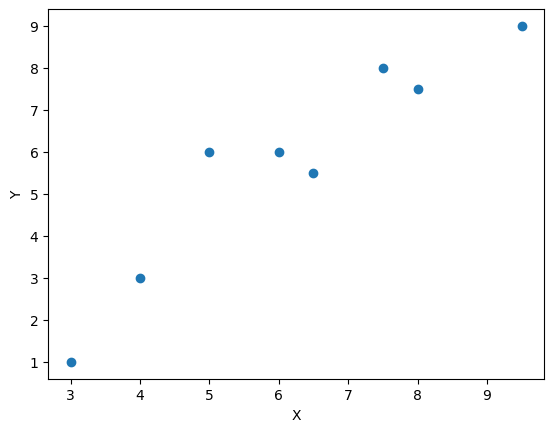

In [ ]:
# plot X,Y
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# covariance và correlation coefficient của X và Y
cov = np.cov(X,Y)
print("Covariance: \n", cov)
corr = np.corrcoef(X,Y)
print("Correlation coefficient: \n", corr)

Covariance: 
 [[4.63839286 5.375     ]
 [5.375      7.        ]]
Correlation coefficient: 
 [[1.         0.94329099]
 [0.94329099 1.        ]]


**(0.5đ)**

Ta thấy hệ số tương quan của $X$ và $Y$ là $0.93$ nên mối quan thuận, tức là nếu $X$ tăng thì $Y$ cũng sẽ tăng.

Vậy có thể xây dựng mô hình hồi quy giữa $X$ và $Y$: $$Y=\beta_0+\beta_1X$$

In [ ]:
x_bar = np.mean(X)
y_bar = np.mean(Y)
print("x_bar = ", x_bar)
print("y_bar = ", y_bar)
beta_1 = np.sum((X-x_bar)*(Y-y_bar))/np.sum((X-x_bar)**2)
beta_0 = y_bar - beta_1*x_bar
print("beta_1 = ", beta_1)
print("beta_0 = ", beta_0)

x_bar =  6.1875
y_bar =  5.75
beta_1 =  1.1588065447545717
beta_0 =  -1.4201154956689122


**(0.5đ)** Vậy mô hình hồi quy giữ điểm trung bình các bài lab $Y$ và điểm thi cuối kỳ $X$ là: $$Y\approx-1,42+1,15X$$

b. Dự đoán điểm điểm thi cuối kỳ biết điểm trung bình các bài lab của một sinh viên là 6.2

**(0.5đ)** Điểm trung bình các bài lab 6.2 => $Y=6.2$. Thay $Y$ vào công thức hồi quy ta xây dựng bên trên.

In [ ]:
Y1 = 6.15
X1 = (Y1-beta_0)/beta_1
print("X1 = ", X1)

X1 =  6.532682724252492


**(0.5đ)** Vậy điểm trung bình các lab của bạn sinh viên này khoảng 6.5đ